In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('Dataset1.csv')
data.head()

,RECEPTOR_LIGAND,pIC50,ESTAT,HB,VDW,DSOLV
0,3pm0_ab_1_BC,6.619789,-0.0605,-1.2707,-12.5334,3.2176
1,3pm0_ab_4_BC,4.698970,-0.0482,-0.5903,-8.6868,1.5751
2,3pm0_ab_5_BC,6.602060,-0.3955,-1.0635,-12.5881,1.7955
3,3pm0_ab_6_BC,6.920819,-0.1713,-0.6000,-12.3158,1.2083
4,3pm0_ab_7_BC,7.154902,-0.0624,-0.5607,-12.4820,1.4207


In [ ]:
y = data['pIC50']
x = data.drop(labels=['RECEPTOR_LIGAND', 'pIC50'], axis = 'columns')

In [ ]:
print(x)

          ESTAT      HB      VDW      DSOLV
0       -0.0605 -1.2707 -12.5334     3.2176
1       -0.0482 -0.5903  -8.6868     1.5751
2       -0.3955 -1.0635 -12.5881     1.7955
3       -0.1713 -0.6000 -12.3158     1.2083
4       -0.0624 -0.5607 -12.4820     1.4207
..          ...     ...      ...        ...
316      0.1271 -1.4212 -10.4479     1.8965
317     -0.1184 -0.8472 -14.7992     3.2839
318     -0.0787 -1.1483 -13.3799     2.9682
319     -0.0639 -0.4082 -11.4333     0.0561
320     -0.0617 -1.2691 -12.7439     2.0174

[321 rows x 4 columns]


In [ ]:
print(y)

0      6.619789
1      4.698970
2      6.602060
3      6.920819
4      7.154902
         ...   
316    6.301030
317    5.387216
318    5.004365
319    5.468521
320    6.853872
Name: pIC50, Length: 321, dtype: float64


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=32)

In [ ]:
from sklearn.svm import SVR
sr = SVR()
sr.fit(x_train,y_train)
sr.score(x_train, y_train)

0.10866358709592372

In [ ]:
y_pred=sr.predict(x_test)
print(y_pred)

[6.76691549 7.14406083 7.02054048 7.58397584 7.2521099  7.34516264
 7.47223319 7.36901997 6.99038902 7.03851904 6.69034833 7.02656969
 7.12470881 6.69492662 7.02665487 7.18732495 7.05279071 6.8469293
 7.03147197 7.23759248 6.5773702  6.87887839 7.13106327 7.22479074
 6.91243243 6.91960531 7.28755876 6.57003253 7.34741827 7.44569312
 6.68563247 7.21742961 7.33678949 7.32316162 6.99040215 6.78255542
 7.26785382 6.79340585 7.25488709 7.01281477 7.2906203  7.16429569
 6.82018742 7.45509355 7.13269976 7.21224132 7.41877773 7.24384828
 6.66633595 7.37255642 7.1254868  7.25635592 7.18194201 6.80648452
 7.05190052 7.27951174 7.32700082 7.0904115  7.019736   7.35637312
 7.35266843 7.06841081 7.20688314 7.48492591 6.68922299 7.04384097
 6.91099497 7.37521764 7.27193329 7.35841516 7.07171361 7.26107071
 7.1711805  7.79275532 7.22116223 7.28286861 7.11619216 6.71568134
 7.42113484 7.33751963 7.36962532 7.41978875 7.06415293 6.82291463
 6.60579813 6.78946506 7.27727063 7.22577676 7.04492278 7.06963

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.06802592306291066

Text(0.5, 1.0, 'Actual v/s Predicted')

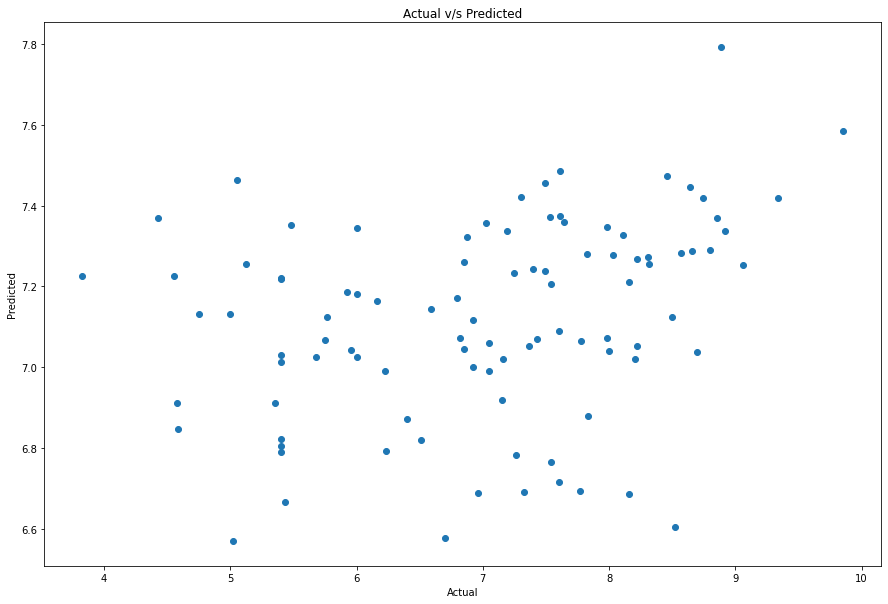

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual v/s Predicted')

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


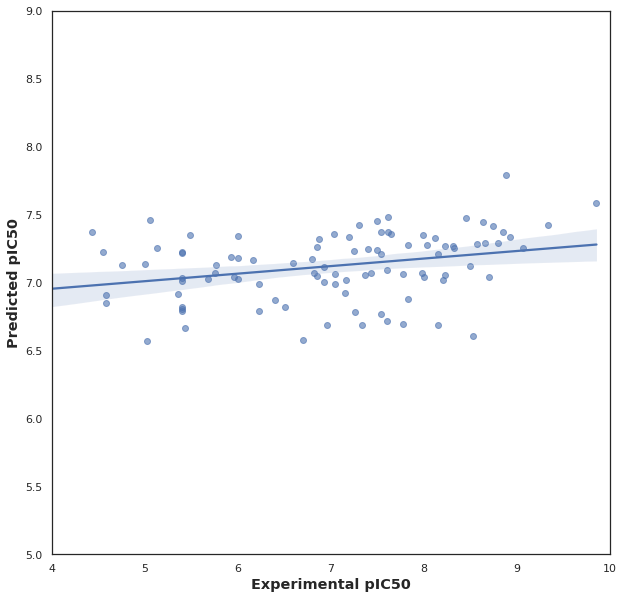

In [ ]:
sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(y_test, y_pred, scatter_kws={'alpha':0.6})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(4, 10)
ax.set_ylim(5, 9)
ax.figure.set_size_inches(10, 10)
plt.show
plt.savefig('SVR plot')

In [ ]:
pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted Value,Difference
292,7.537602,6.766915,0.770687
66,6.585695,7.144061,-0.558366
174,8.207608,7.020540,1.187068
223,9.853872,7.583976,2.269896
193,9.060481,7.252110,1.808371
130,6.000000,7.345163,-1.345163
44,8.455932,7.472233,0.983699
282,4.429457,7.369020,-2.939563
307,7.045757,6.990389,0.055368
286,8.698970,7.038519,1.660451
